In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
commit_df = pd.read_csv('oss_data/commits.csv')
issues_df = pd.read_csv('oss_data/issues.csv')
pr_df = pd.read_csv('oss_data/pull_requests.csv')

# clean up dfs
commit_df.drop(columns=['Unnamed: 0', 'data_collection_date'], inplace=True)
issues_df.drop(columns=['Unnamed: 0', 'data_collection_date'], inplace=True)
pr_df.drop(columns=['Unnamed: 0', 'data_collection_date'], inplace=True)

print("commit_df:", commit_df.info())
print()
print("issues_df:", issues_df.info())
print()
print("pr_df:", pr_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4453789 entries, 0 to 4453788
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   repo_id           int64 
 1   repo_name         object
 2   event_type        object
 3   event_datetime    object
 4   contributor_name  object
dtypes: int64(1), object(4)
memory usage: 169.9+ MB
commit_df: None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68974 entries, 0 to 68973
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   repo_id           68974 non-null  int64 
 1   repo_name         68974 non-null  object
 2   event_type        68974 non-null  object
 3   event_datetime    68974 non-null  object
 4   contributor_name  68974 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.6+ MB
issues_df: None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Co

## Combining commit_df and issues_df to 1 table, as the only real difference in schema is the event_type

In [3]:
comb_df = pd.concat([commit_df, issues_df], ignore_index=True).where(pd.notnull(pd.concat([issues_df, commit_df], ignore_index=True)), None)
comb_df.head()

,repo_id,repo_name,event_type,event_datetime,contributor_name
0,25939,ompi,commit,2018-04-27 05:30:01-05:00,Themos Tsikas
1,25918,sage,commit,2008-03-26 06:11:39-05:00,mabshoff
2,26069,Trilinos,commit,2005-07-23 00:15:42-05:00,Marzio Sala
3,26069,Trilinos,commit,2005-07-23 00:15:42-05:00,Marzio Sala
4,25939,ompi,commit,2018-04-27 05:30:01-05:00,Themos Tsikas


In [4]:
comb_df.value_counts('event_type')

event_type
commit           4453789
issue_created      68974
Name: count, dtype: int64

In [5]:
comb_df.sort_values(by='contributor_name')

,repo_id,repo_name,event_type,event_datetime,contributor_name
1535919,25952,yt,commit,2010-12-02 17:20:00-06:00,"""Stephen Skory stephenskory@yahoo.com"""
741057,25992,landlab,commit,2013-04-23 00:16:20-05:00,(no author)
741109,25992,landlab,commit,2013-04-23 00:16:20-05:00,(no author)
741059,25992,landlab,commit,2013-04-23 00:16:20-05:00,(no author)
741060,25992,landlab,commit,2013-04-23 00:16:20-05:00,(no author)
...,...,...,...,...,...
822880,25859,llvm-project,commit,2014-06-10 09:44:02-05:00,None
1073128,25952,yt,commit,2007-02-08 22:13:58-06:00,NaN
1142102,25859,llvm-project,commit,2015-07-31 12:58:14-05:00,None
1753868,25917,psi4,commit,2017-07-12 00:25:44-05:00,NaN


In [6]:
comb_df.drop_duplicates(inplace=True)
comb_df.value_counts('event_type')

event_type
commit           942548
issue_created     68751
Name: count, dtype: int64

In [7]:
comb_df[comb_df['contributor_name'] is not None and comb_df['contributor_name'] != '(no author)']

,repo_id,repo_name,event_type,event_datetime,contributor_name
0,25939,ompi,commit,2018-04-27 05:30:01-05:00,Themos Tsikas
1,25918,sage,commit,2008-03-26 06:11:39-05:00,mabshoff
2,26069,Trilinos,commit,2005-07-23 00:15:42-05:00,Marzio Sala
6,25859,llvm-project,commit,2018-12-20 06:59:05-06:00,Ulrich Weigand
7,26042,inexlib_rio,commit,2015-11-13 10:42:55-06:00,Guy Barrand
...,...,...,...,...,...
4522758,25918,sage,issue_created,2006-09-12 01:11:15,e13df781-8644-42aa-9d66-1e8d332e25bb
4522759,25918,sage,issue_created,2006-09-12 00:45:22,e13df781-8644-42aa-9d66-1e8d332e25bb
4522760,25918,sage,issue_created,2006-09-12 00:41:16,e13df781-8644-42aa-9d66-1e8d332e25bb
4522761,25918,sage,issue_created,2006-09-11 11:22:29,ghost


In [8]:
import random
num = int(random.random() * (comb_df['contributor_name'].nunique()))
name = comb_df.iloc[num]['contributor_name']
name

'William Stein'

In [9]:
person_df = comb_df[comb_df['contributor_name'] == name]
person_df.head()

,repo_id,repo_name,event_type,event_datetime,contributor_name
124,25918,sage,commit,2010-02-15 20:53:39-06:00,William Stein
143,25918,sage,commit,2007-09-07 02:07:06-05:00,William Stein
151,25918,sage,commit,2007-11-17 22:12:30-06:00,William Stein
188,25918,sage,commit,2007-06-17 06:26:24-05:00,William Stein
197,25918,sage,commit,2007-01-13 15:22:30-06:00,William Stein


# Do people who commit raise issues, or do people who raise issues also commit?

## Graph all num of commits vs num of issues raised for each person

In [10]:
person_df = comb_df.groupby(['contributor_name', 'event_type']).size().unstack(fill_value=0)


In [11]:
person_df.sort_values(by='contributor_name')

event_type,commit,issue_created
contributor_name,,
"""Stephen Skory stephenskory@yahoo.com""",1,0
(no author),2,0
--quiet,4,0
004f9c6c-ac10-4a12-a367-dc45be16a4d0,0,1
0102db7c-e008-49db-81b0-d3eb9e7e355d,0,1
...,...,...
Ärpit Merchant,1,0
Édouard Rousseau,6,0
Émile Nadeau,40,0


In [12]:
person_df['total_actions'] = person_df['commit'] + person_df['issue_created']
person_df

event_type,commit,issue_created,total_actions
contributor_name,,,
"""Stephen Skory stephenskory@yahoo.com""",1,0,1
(no author),2,0,2
--quiet,4,0,4
004f9c6c-ac10-4a12-a367-dc45be16a4d0,0,1,1
0102db7c-e008-49db-81b0-d3eb9e7e355d,0,1,1
...,...,...,...
Ärpit Merchant,1,0,1
Édouard Rousseau,6,0,6
Émile Nadeau,40,0,40


<Axes: xlabel='commit', ylabel='issue_created'>

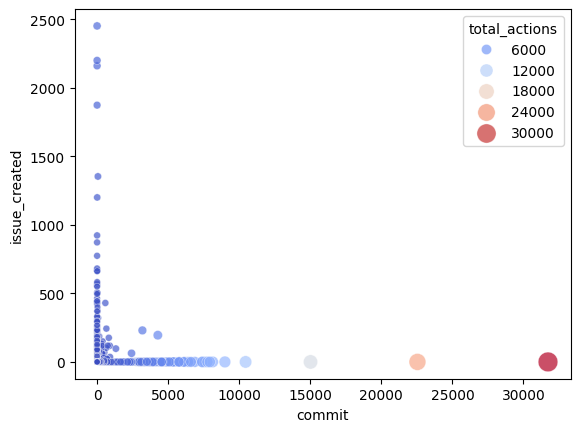

In [13]:
sns.scatterplot(data=person_df, x='commit', y='issue_created', hue='total_actions', palette='coolwarm', size='total_actions', sizes=(20, 200), alpha=0.7)

### How about for the top 50 total contributors?

In [14]:
top50_df = person_df.sort_values(by='total_actions', ascending=False)[:50]
top50_df.describe()

event_type,commit,issue_created,total_actions
count,50.000000,50.00000,50.000000
mean,6310.980000,8.52000,6319.500000
std,4901.654983,42.20854,4897.177756
min,3154.000000,0.00000,3154.000000
25%,3892.000000,0.00000,3892.000000
50%,5000.500000,0.00000,5000.500000
75%,6561.750000,0.00000,6561.750000
max,31725.000000,230.00000,31725.000000


<Axes: xlabel='commit', ylabel='issue_created'>

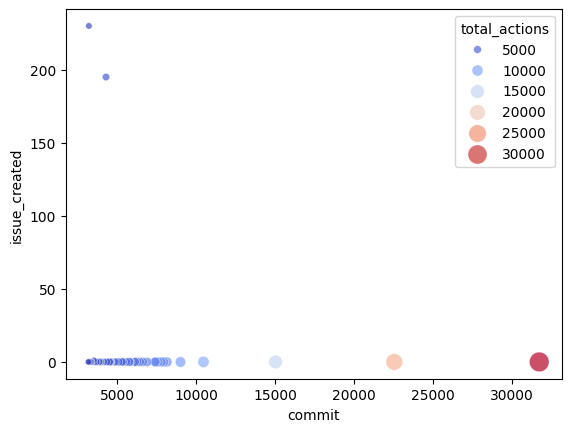

In [15]:
sns.scatterplot(data=top50_df, x='commit', y='issue_created', hue='total_actions', palette='coolwarm', size='total_actions', sizes=(20, 200), alpha=0.7)

## Do people who raise issues like to commit? Using top 100

In [16]:
issue100_df = person_df.sort_values(by='issue_created', ascending=False)[:100]
issue100_df.describe()

event_type,commit,issue_created,total_actions
count,100.000000,100.000000,100.000000
mean,108.520000,386.810000,495.330000
std,541.166893,429.934895,665.285464
min,0.000000,130.000000,130.000000
25%,0.000000,170.500000,173.500000
50%,0.000000,230.500000,259.500000
75%,1.000000,431.250000,499.000000
max,4273.000000,2451.000000,4468.000000


<Axes: xlabel='issue_created', ylabel='commit'>

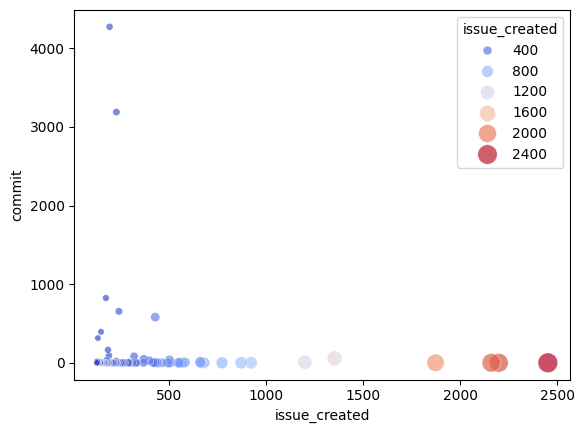

In [17]:
sns.scatterplot(data=issue100_df, y='commit', x='issue_created', hue='issue_created', palette='coolwarm', size='issue_created', sizes=(20, 200), alpha=0.7)

### Generally, the people who raise issues don't really commit

Take all guys within the 25th to 75th percentile, and graph their issues vs commits

<Axes: ylabel='commit'>

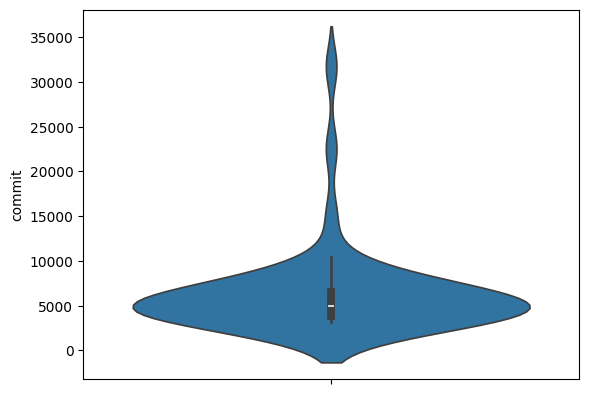

In [18]:
sns.violinplot(data=top50_df['commit'])

<Axes: ylabel='issue_created'>

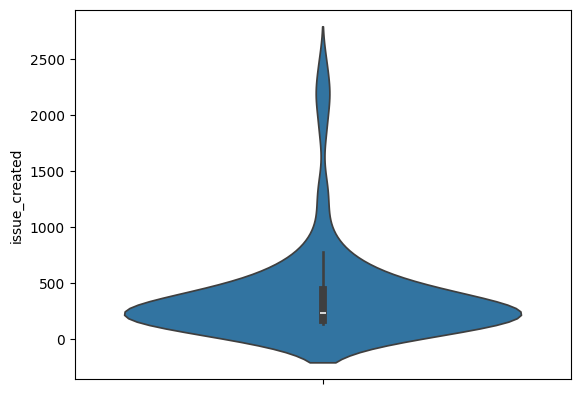

In [19]:
sns.violinplot(data=issue100_df['issue_created'])

In [20]:
top_contributors = person_df[(person_df['commit'] >= 50) & (person_df['issue_created'] >= 50)]

There are only 14 people who committed > 100 times and created > 100 issues. 29 Who do 50 or more of each.

## What repositories are these people commiting & creating issues for?

In [21]:
top_contributors.reset_index(inplace=True)

In [22]:
names = top_contributors['contributor_name'].to_list()